In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'D:\Python Projects\Diwali Sales Dataset.csv', encoding = 'unicode_escape')

In [4]:
df.shape


(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# to delete any row or column Drop function is used 
# axis = 1 represents column and axis = 0 represents row
df.drop (['Status','unnamed1'],axis = 1, inplace = True)

In [6]:
# to check whether the two columns are deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [7]:
# to check null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
# in Amount column i have 12 null values. 

In [8]:
# to delete null values 
df.dropna(inplace = True)

In [9]:
# to check whether null values are deleted or not
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
df.shape


(11239, 13)

# Exploratory Data Analysis

# Gender

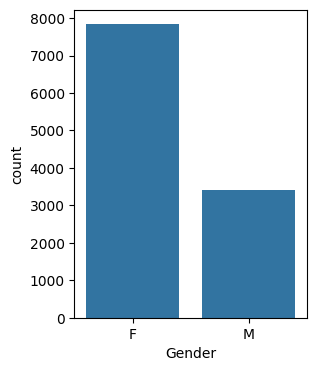

In [15]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = 'Gender', data = df)

In [ ]:
# to know the count of males and females 

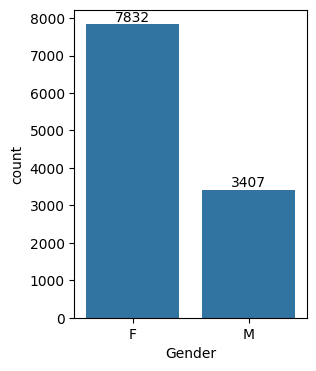

In [17]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Gender', ylabel='Amount'>

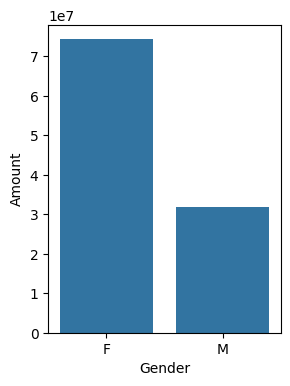

In [19]:
# Group by gender on the basis of Amount

plt.figure(figsize = (3,4))

sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Gender', y = 'Amount',  data = sales_gen)

In [ ]:
# The above graphs show that most of the buyers are females and their purchasing power is higher than that of the men. 

# Age

<Axes: xlabel='Age Group', ylabel='count'>

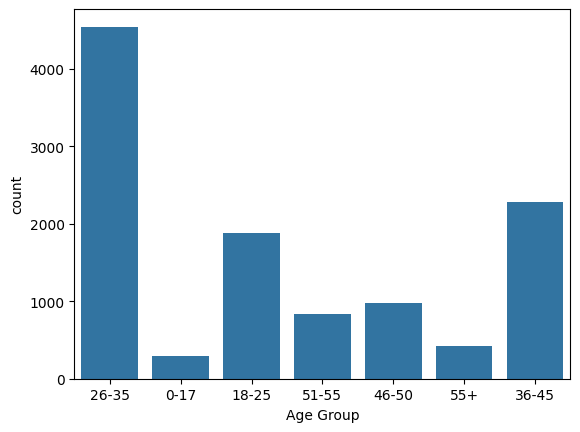

In [20]:
sns.countplot(data = df, x = 'Age Group')

<Axes: xlabel='Age Group', ylabel='count'>

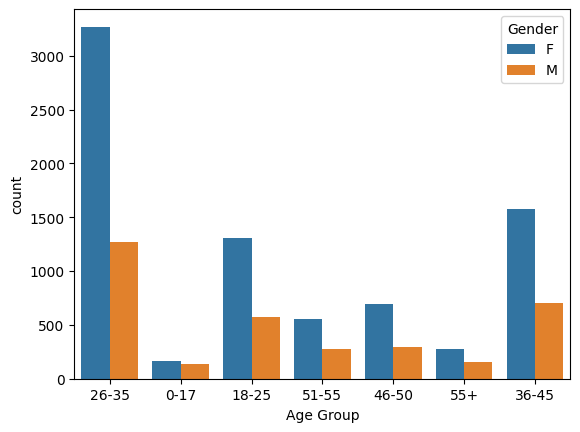

In [21]:
sns.countplot(data = df, x = 'Age Group',hue = 'Gender') # here hue further divides the gender into men and women

<Axes: xlabel='Age Group', ylabel='Amount'>

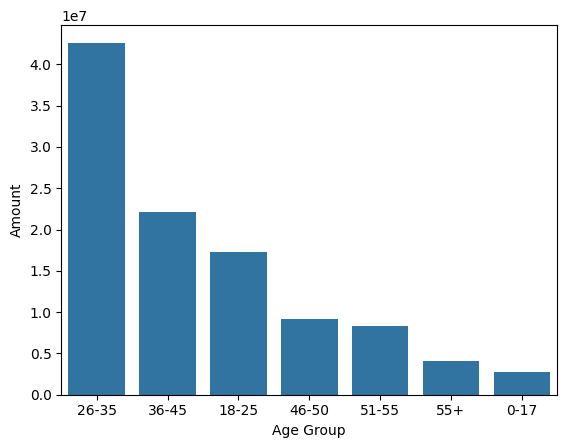

In [23]:
# total amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

In [ ]:
#from the above graphs we can see that most of the buyers are of age group between 26-35 years and mostly females.

# State

<Axes: xlabel='State', ylabel='Orders'>

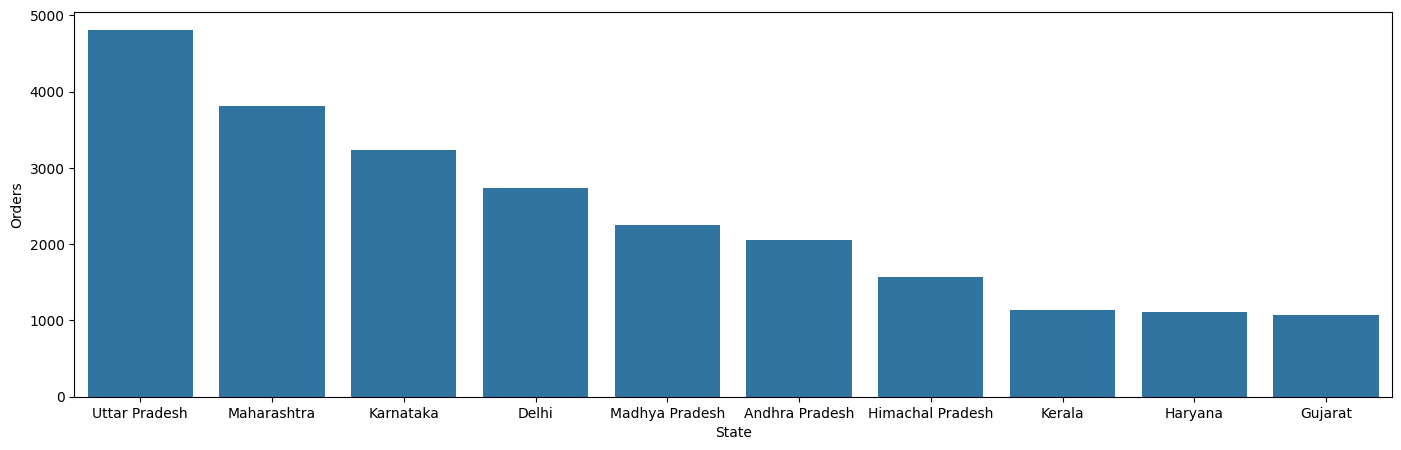

In [26]:
# total no. of orders from top 10 states

plt.figure(figsize = (17,5))

sales_state = df.groupby(['State'], as_index = False ) [ 'Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.barplot(data = sales_state, x = 'State', y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

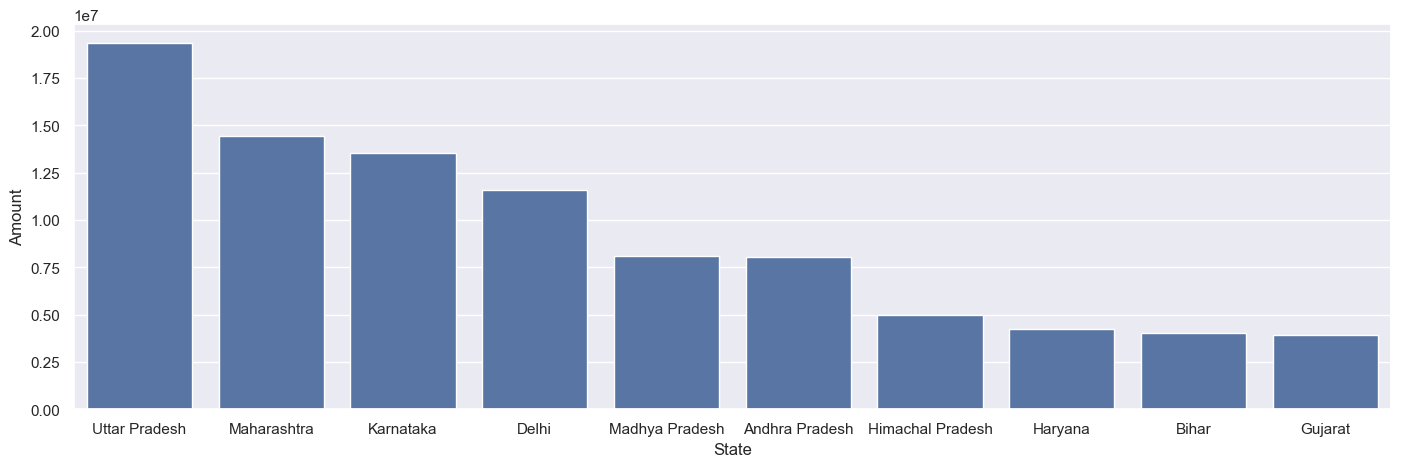

In [28]:
# total amount/sales from top 10 states
plt.figure(figsize = (17,5))

sales_state = df.groupby(['State'], as_index = False ) [ 'Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount')

In [ ]:
# from above graphs we can see that most of the orders and sales/amount are from UP, Maharashtra, and Karnatka.

# Marital_Status

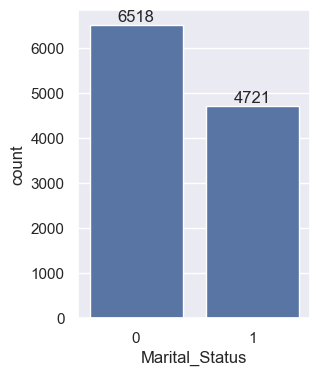

In [31]:
plt.figure(figsize = (3,4))                           # Married = 0 and Unmarried = 1
ax = sns.countplot(data = df, x = 'Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

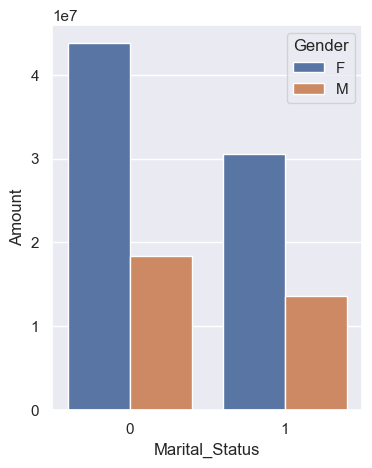

In [34]:
# groupby Marital_Status on the basis of Amount

married_unmarried = df.groupby(['Marital_Status','Gender'], as_index = False ) [ 'Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(4,5)})

sns.barplot(data = married_unmarried, x = 'Marital_Status', y = 'Amount',hue = 'Gender')

In [ ]:
# from the above graph we can see that most of the buyers are married (women) and they have high purchasing power

# Occupation

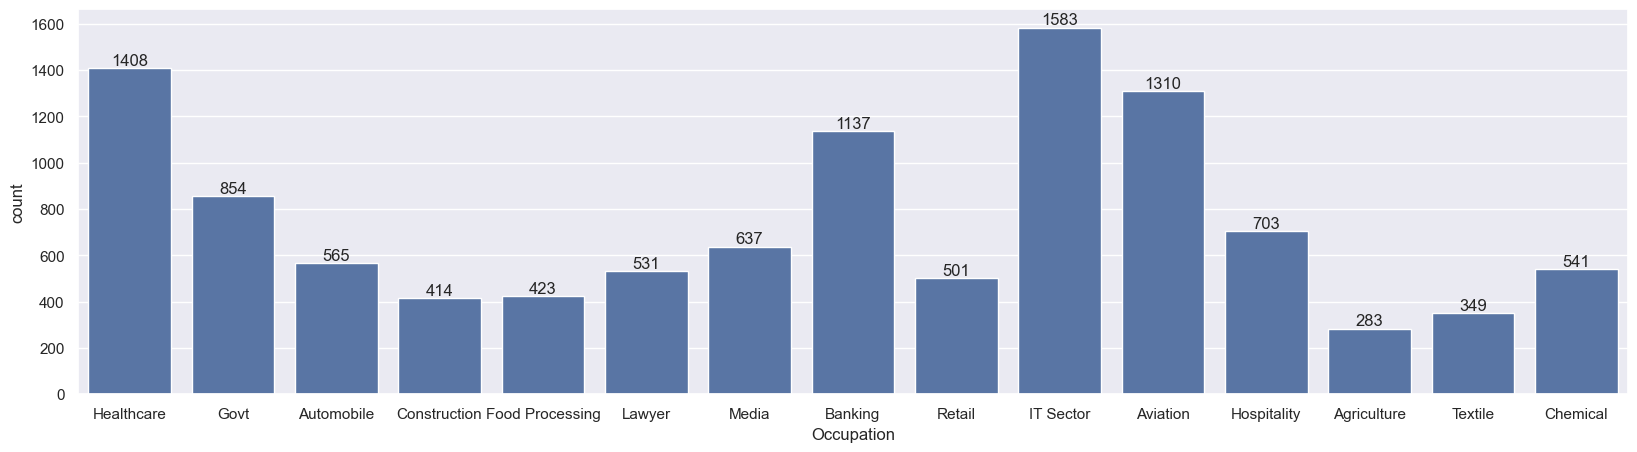

In [41]:
# count of Occupations

plt.figure(figsize = (20,5))
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

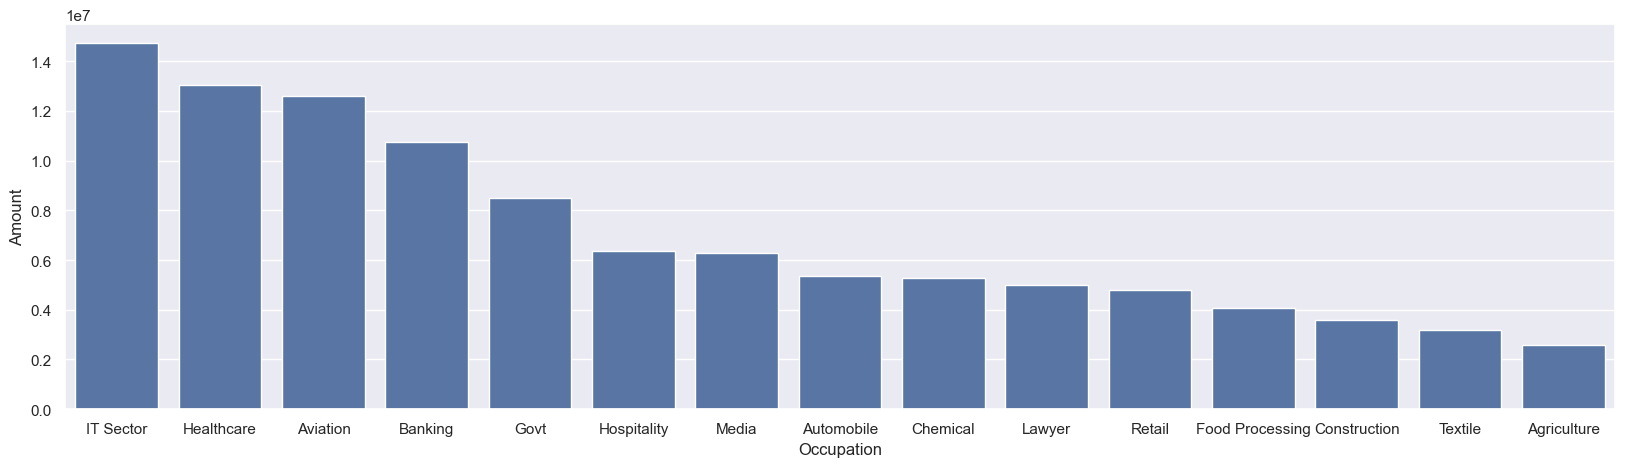

In [42]:
# group by occupations on the basis of Amount/Sales. 

plt.figure(figsize = (20,5))
sales_occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(data = sales_occupation, x = 'Occupation', y = 'Amount')

In [ ]:
# from above graphs we can see that most of the buyers are working in IT, Healthcare, and Aviation sectors

# Product Category

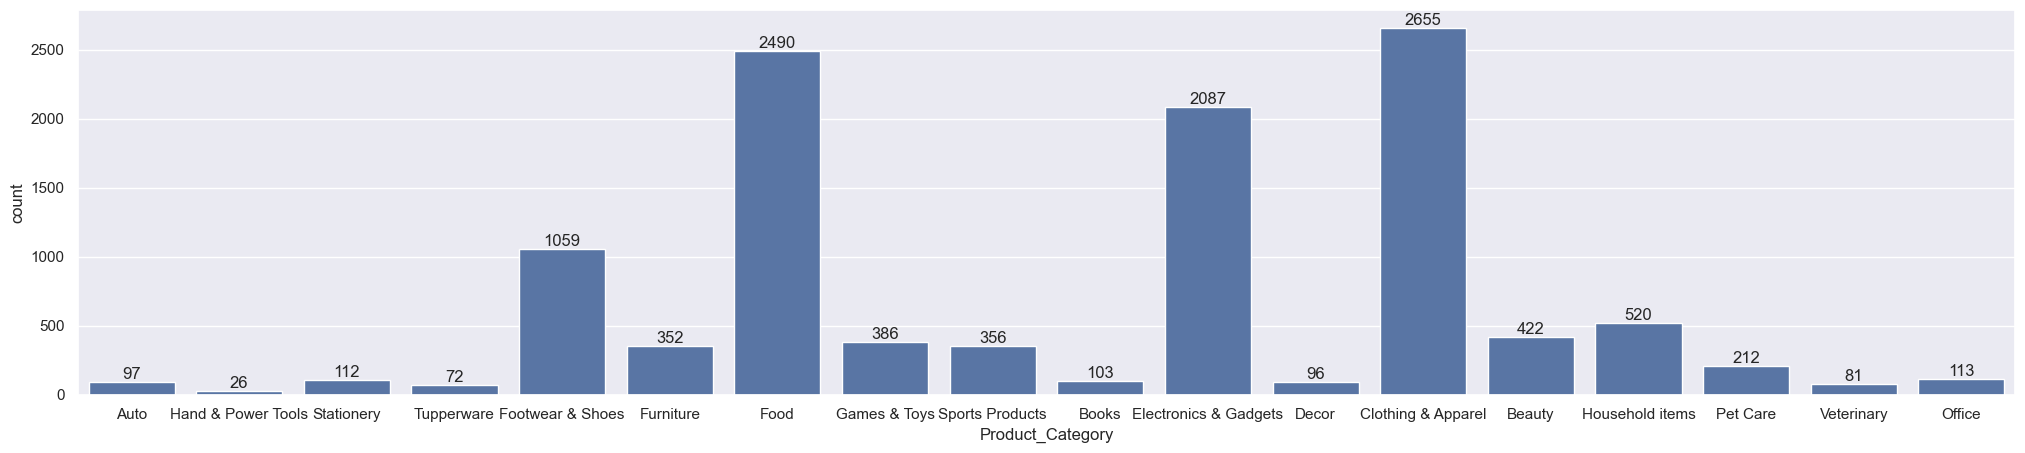

In [43]:
# products that have been sold the most
plt.figure(figsize = (25,5))

ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
# from above graphs we can see that most of the sold products are from food, Clothing and electronics categories.